In [1]:
!sudo ls

Untitled.ipynb	work


In [1]:
!#apt-get install -y software-properties-common python-software-properties
!apt-add-repository -y ppa:mosquitto-dev/mosquitto-ppa
!#sudo apt-get update
!apt-get install -y mosquitto mosquitto-clients

!pip install paho-mqtt
!#sudo apt-add-repository ppa:mosquitto-dev/mosquitto-ppa
!#sudo apt-get update
!#sudo apt-get install -y mosquitto

!apt-get install -y systemd
!systemctl enable mosquitto.service

gpg: keyring `/tmp/tmpm788k4ti/secring.gpg' created
gpg: keyring `/tmp/tmpm788k4ti/pubring.gpg' created
gpg: requesting key 262C4500 from hkp server keyserver.ubuntu.com
gpg: /tmp/tmpm788k4ti/trustdb.gpg: trustdb created
gpg: key 262C4500: public key "Launchpad mosquitto" imported
gpg: Total number processed: 1
gpg:               imported: 1  (RSA: 1)
OK
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libc-ares2 libev4 libmosquitto1 libuv1 libwebsockets7 libwrap0 tcpd
Suggested packages:
  apparmor
The following NEW packages will be installed:
  libc-ares2 libev4 libmosquitto1 libuv1 libwebsockets7 libwrap0 mosquitto
  mosquitto-clients tcpd
0 upgraded, 9 newly installed, 0 to remove and 1 not upgraded.
Need to get 419 kB of archives.
After this operation, 1280 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu xenial/main amd64 libwrap0 amd64 7.6.q-25 [4

In [1]:
global badh, badt, badp, badl, maxtemp, maxhum, maxpress, maxlum
maxtemp = 0
maxhum = 0
maxpress = 0
maxlum = 0

badt = False
badh = False
badp = False
badl = False

sender {"data": {"temperature": 666}}


<IPython.core.display.Javascript object>


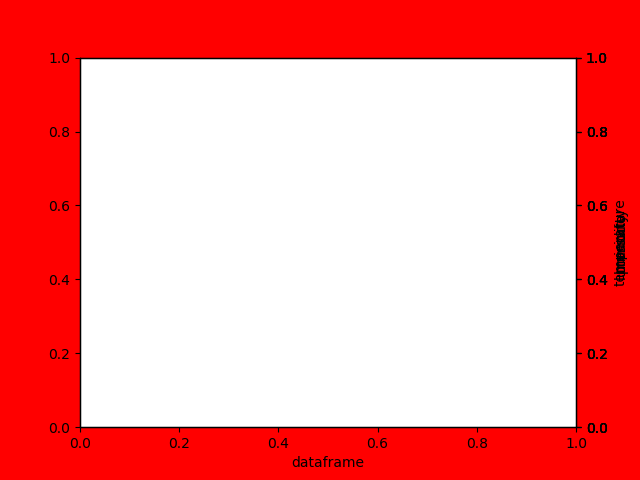

connected (b'oj')
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 

KeyboardInterrupt: 

sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}


In [9]:
%matplotlib notebook
import threading
import ssl
import sys
import paho.mqtt.client
import json
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

fig = plt.figure()
plt.ion()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()

host.set_xlabel("dataframe")
par1.set_ylabel("temperature")
par2.set_ylabel("pressure")
par3.set_ylabel("humidity")
par4.set_ylabel("luminocity")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.4)
color3 = plt.cm.viridis(.7)
color4 = plt.cm.viridis(.9)


# right, left, top, bottom
#par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
#par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')



fig.patch.set_facecolor('red')
fig.show()
fig.canvas.draw()

p1Data = [0]
p2Data = [0]
p3Data = [0]
p4Data = [0]

dataTime = []
i = 0

def temperatureLimits(x):
    global maxtemp
    maxtemp = x
    return x

def pressureLimits(x):
    global maxpress
    maxpress = x
    return x

def humidityLimits(x):
    global maxhum
    maxhum = x
    return x

def luminocityLimits(x):
    global maxlum
    print("called!")
    print(maxlum)
    maxlum = x
    return x

def on_connect(client, userdata, flags, rc):
	print('connected (%s)' % client._client_id)
	client.subscribe(topic='[topic]', qos=2)

def on_message(client, userdata, message):
    global badh, badt, badp, badl, maxtemp, maxhum, maxpress, maxlum
    try:
        print("client got a message")
        j = json.loads(message.payload)
        print("client " + j)
        if(j["data"]):
            s = j["data"]
            print(s)
            
            joined = True
            try:
                 if s['joined']:
                    pass
            except:
                joined = False
                
            if(joined):
                return;
                
            try: 
                t = s['temperature']
                print(t)
                p1Data.append(t)
                badt = t > maxtemp
            except KeyError: p1Data.append(p1Data[-1])
            
            try: 
                p = s['pressure']
                print(p)
                p2Data.append(p)
                badp = p > maxpress
            except KeyError: p2Data.append(p2Data[-1])
                    
            try: 
                h = s['humidity']
                print(h)
                p3Data.append(h)
                badh = h > maxhum
            except KeyError: p3Data.append(p3Data[-1])
            
                                
            try: 
                l = s['luminocity']
                print(l)
                p4Data.append(l)
                badl = l > maxlum
            except KeyError: p4Data.append(p4Data[-1])
            
            
            dataTime.append(++i)
            
            par1.clear()
            par2.clear()
            par3.clear()
            par4.clear()
            
            
            p1, = par1.plot(p1Data, color=color1,label="temperature")
            p2, = par2.plot(p2Data, color=color2,label="pressure")
            p3, = par3.plot(p3Data, color=color3,label="humidity")
            p4, = par4.plot(p4Data, color=color4, label="luminocity")
            
            par1.spines['right'].set_position(('outward', 0))   
            par2.spines['right'].set_position(('outward', 40))   
            par3.spines['right'].set_position(('outward', 80))   
            par4.spines['right'].set_position(('outward', 120))   
            par1.yaxis.label.set_color(p1.get_color())
            par2.yaxis.label.set_color(p2.get_color())
            par3.yaxis.label.set_color(p3.get_color())
            par4.yaxis.label.set_color(p4.get_color())
            
            par1.yaxis.set_label_position('left')
            par2.yaxis.set_label_position('left')
            par3.yaxis.set_label_position('left')
            par4.yaxis.set_label_position('left')
            
            lns = [p1, p2, p3, p4]
            host.legend(handles=lns, loc='best')
            
            if not badh and not badt and not badp and not badl:
                fig.patch.set_facecolor('red')
            else :
                fig.patch.set_facecolor('white')
    
            fig.tight_layout() 
            fig.canvas.draw()

    except KeyError:
        print("bad msg")
    
    #print('------------------------------')
    #print('topic: %s' % message.topic)
    #print(message.payload.decode("utf-8"))
    #print('qos: %d' % message.qos)
    
once = True
client  = paho.mqtt.client.Client(client_id='oj', userdata=None,  transport="tcp")
def work(once, client):
    if once:
        once = False
        client.on_connect = on_connect
        client.on_message = on_message
        client.connect('127.0.0.1', 1883, 60)
        client.subscribe("data")
        client.loop_forever()
        
        
work(once, client)

#thread = threading.Thread(target=work, args=(once, client))
#thread.start()


In [3]:
interact_manual(temperatureLimits, x=100);
interact_manual(pressureLimits, x=1000);
interact_manual(humidityLimits, x=1000);
interact_manual(luminocityLimits, x=1000);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Button(description='Run Intera…

interactive(children=(IntSlider(value=1000, description='x', max=3000, min=-1000), Button(description='Run Int…

interactive(children=(IntSlider(value=1000, description='x', max=3000, min=-1000), Button(description='Run Int…

interactive(children=(IntSlider(value=1000, description='x', max=3000, min=-1000), Button(description='Run Int…

In [7]:
import time
 
clientSender  = paho.mqtt.client.Client(client_id='sender', userdata=None,  transport="tcp")
onceSender = True
def sender(once, client):
    if once:
        once = False
        client.on_connect = on_connect
        client.connect('127.0.0.1', 1883, 60)
        
        while True:
            
            data = {"data" : {"temperature" : 666}}
            payload=json.dumps(data)
            print("sender " +  payload)
            (rc, mid) = client.publish(topic="data", payload=payload, qos=2)
            time.sleep(1)
        
thread2 = threading.Thread(target=sender, args=(onceSender, clientSender))
thread2.start()

#sender(onceSender, clientSender)

sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}
sender {"data": {"temperature": 666}}


In [4]:
import json
data = {"data" : {"temperature" : 666}}
payload=json.dumps(data)
j = json.loads(payload)
j["data"]

{'temperature': 666}